# 04. 행렬과 행렬의 기본연산

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.linalg import toeplitz


import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') 
plt.rcParams.update({'font.size':14}) 

<br>

## 04.01. `NumPy`에서 행렬 생성과 시각화

In [4]:
A = np.random.randn(3,4)
B = np.random.randn(100,100)
C = -toeplitz(np.arange(8),np.arange(10))

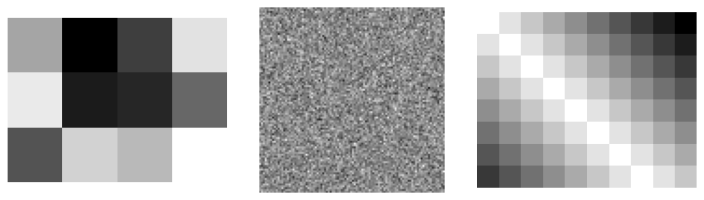

In [7]:
fig,axs = plt.subplots(1,3,figsize=(10,3))

axs[0].imshow(A,cmap='gray')
axs[1].imshow(B,cmap='gray')
axs[2].imshow(C,cmap='gray')

for i in range(3): axs[i].axis('off')
plt.tight_layout()
plt.show()

<br>

### 인덱싱, 슬라이싱

In [45]:
A = np.reshape(np.arange(1,10),(3,3))
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


- 단일 행 인덱싱

In [50]:
print( A[1,:] )
# print( A[1] )

[4 5 6]


- 여러 행 인덱싱

In [54]:
print(A[0:2,:])

[[1 2 3]
 [4 5 6]]


- 열 인덱싱

In [52]:
print( A[:,1] )

[2 5 8]


- 여러 열 인덱싱

In [55]:
print(A[:,1:])

[[2 3]
 [5 6]
 [8 9]]


<br>

#### 전체행렬과 부분행렬

In [178]:
C = np.arange(100).reshape((10,10))
C_1 = C[0:5:1,0:5:1]

print('전체행렬:\n')
print(C)

print('\n부분행렬:\n')
print(C_1)

전체행렬:

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]

부분행렬:

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


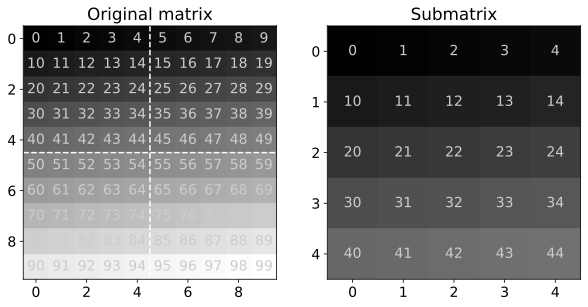

In [179]:
_,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].imshow(C,cmap='gray',origin='upper',vmin=0,vmax=np.max(C))
axs[0].plot([4.5,4.5],[-.5,9.5],'w--')
axs[0].plot([-.5,9.5],[4.5,4.5],'w--')
axs[0].set_title('Original matrix')

for (j,i),num in np.ndenumerate(C):
  axs[0].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')

axs[1].imshow(C_1,cmap='gray',origin='upper',vmin=0,vmax=np.max(C))
axs[1].set_title('Submatrix')

for (j,i),num in np.ndenumerate(C_1):
  axs[1].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')

plt.show()

#### 블록이동

In [180]:
C_1 = C[0:5:1,0:5:1]
C_2 = C[0:5:1,5:10:1]
C_3 = C[5:10:1,0:5:1]
C_4 = C[5:10:1,5:10:1]

newMatrix = np.vstack( (np.hstack((C_4,C_3)),
                        np.hstack((C_2,C_1))) )

print(newMatrix)

[[55 56 57 58 59 50 51 52 53 54]
 [65 66 67 68 69 60 61 62 63 64]
 [75 76 77 78 79 70 71 72 73 74]
 [85 86 87 88 89 80 81 82 83 84]
 [95 96 97 98 99 90 91 92 93 94]
 [ 5  6  7  8  9  0  1  2  3  4]
 [15 16 17 18 19 10 11 12 13 14]
 [25 26 27 28 29 20 21 22 23 24]
 [35 36 37 38 39 30 31 32 33 34]
 [45 46 47 48 49 40 41 42 43 44]]


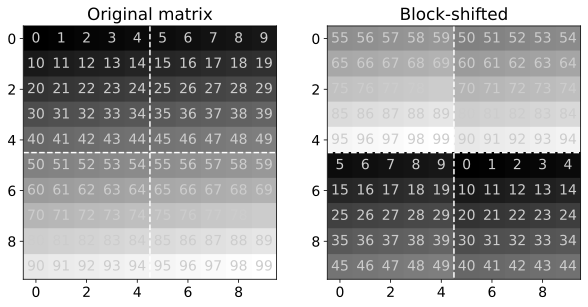

In [181]:
_,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].imshow(C,cmap='gray',origin='upper',vmin=0,vmax=np.max(C))
axs[0].plot([4.5,4.5],[-.5,9.5],'w--')
axs[0].plot([-.5,9.5],[4.5,4.5],'w--')
axs[0].set_title('Original matrix')

for (j,i),num in np.ndenumerate(C):
  axs[0].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')

axs[1].imshow(newMatrix,cmap='gray',origin='upper',vmin=0,vmax=np.max(C))
axs[1].plot([4.5,4.5],[-.5,9.5],'w--')
axs[1].plot([-.5,9.5],[4.5,4.5],'w--')
axs[1].set_title('Block-shifted')

for (j,i),num in np.ndenumerate(newMatrix):
  axs[1].text(i,j,num,color=[.8,.8,.8],ha='center',va='center')

plt.show()

<br>

### 특수행렬

#### 난수행렬 (random number matrix)
#### `np.random.randn()`

- 일반적으로 무작위로 추출된 숫자를 가진 행렬

In [65]:
A = np.random.randn(4, 6)
print(A)

[[-0.71781729 -0.88047908  0.87885111 -0.12600502 -1.43449433 -0.28062712]
 [ 0.87227334  0.09272077  0.49326334  0.36264061 -2.83056262  0.03925121]
 [ 0.30083841 -1.12891404 -0.45504624 -0.240679    0.06620618  1.29008692]
 [ 0.43481434  0.1767887  -1.73917536  0.45167498  0.82159579  1.19551524]]


<br>

#### 정방행렬 (square matrix)
- 행 수가 열 수와 같은 행렬 ($\mathbb{R}^{N\times N}$)
- 비정방행렬 (nonsquare matrix) : 행 수와 열 수는 다른 행렬
    
    - 비정방행렬의 행 수가 열 수보다 많으면 '높음', 열 수가 행 수보다 많으면 '넓음'의 표현

<br>

#### 대각행렬 (diagonal matrix)
- **행렬의 대각 (diagonal): 왼쪽 위에서 시작하여, 오른쪽 아래로 내려가는 원소들**
- **대각행렬은 모든 비대각 원소가 0인 행렬**
- 대각 원소는 0일 수도 있음

#### `np.diag(대각원소)`

In [102]:
M1 = np.diag(np.random.randint(0,6,size=8))
print(M1)

[[1 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]]


<br>

#### 삼각행렬 (triangular matrix) 
- **상삼각 행렬 : 0이 아닌 원소가 대각선 위에 존재**
- **하삼각 행렬 : 0이 아닌 원소가 대각선 아래 존재**

#### `np.triu(행렬)` : 상삼각행렬로 변환
#### `np.tril(행렬)` : 하삼각행렬로 변환

In [132]:
a = np.random.randint(10,20,(4,5))
print(a)

[[19 10 18 14 15]
 [16 13 10 19 12]
 [14 15 17 15 10]
 [17 19 14 11 16]]


In [133]:
M2 = np.triu(a)
print(M2)

[[19 10 18 14 15]
 [ 0 13 10 19 12]
 [ 0  0 17 15 10]
 [ 0  0  0 11 16]]


In [134]:
M3 =np.tril(a)
print(M3)

[[19  0  0  0  0]
 [16 13  0  0  0]
 [14 15 17  0  0]
 [17 19 14 11  0]]


<br>

#### 단위행렬 (identity matrix)
- 행렬 또는 벡터에 단위 행렬을 곱하면 동일한 행렬 또는 벡터를 반환 (숫자 1과 같은 존재)
- 단위 행렬은 모든 대각 원소가 1인 정방 대각 행렬
    
    $I$로 표현 : $I_5$는  $5 \times 5$ 단위행렬

#### `np.eye()`

In [135]:
M4 = np.eye(4,dtype=int)
print(M4)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


<br>

#### 영 행렬 (zeros matrix)
- 모든 원소가 0인 행렬

#### `np.zeros()`

In [136]:
M5 = np.zeros((4,5),dtype=int)
print(M5)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


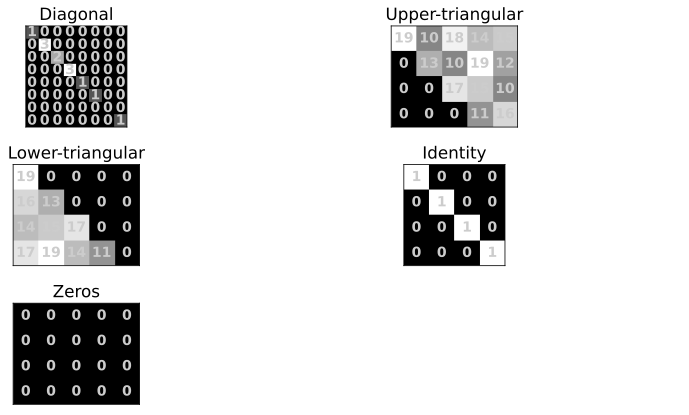

In [137]:
matrices  = [M1,M2,M3,M4,M5]
matLabels = ['Diagonal', 'Upper-triangular','Lower-triangular','Identity','Zeros'  ]

_,axs = plt.subplots(3,2,figsize=(12,6))
axs = axs.flatten()

for mi,M in enumerate(matrices):
  axs[mi].imshow(M,cmap='gray',origin='upper',
                 vmin=np.min(M),vmax=np.max(M))
  axs[mi].set(xticks=[],yticks=[])
  axs[mi].set_title(matLabels[mi])
  
  for (j,i),num in np.ndenumerate(M):
    axs[mi].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',fontweight='bold')

axs[5].set_xticks([])
axs[5].set_yticks([])
axs[5].axis('off')

plt.tight_layout()
plt.show()

<br>

## 04.02. 행렬 수학

### 덧셈과 뺄셈
- 행렬 덧셈/뺄셈은 크기가 같은 두 행렬 사이에서만 성립

In [138]:
A = np.array([  [2,3,4],
                [1,2,4] ])

B = np.array([  [ 0, 3,1],
                [-1,-4,2] ])

print(A+B)

[[ 2  6  5]
 [ 0 -2  6]]


<br>

### 행렬 이동 (Shifting)
- **단위행렬에 스칼라를 곱해서, 더하는 방식**
    
    $\rightarrow$ 대각 원소만 변경되고 나머지는 그대로 
    
    (행렬의 수치적 안정성을 높이고 이동의 효과를 보면서 행렬의 가능한 많은 정보를 보존)
    
$$A + \lambda I$$

In [140]:
A = np.array([ [4,5, 1],
               [0,1,11],
               [4,9, 7]  ])

In [141]:
s = 6

In [142]:
print('원래 행렬:')
print(A), print(' ')

print('브로드캐스팅:')
print(A + s), print(' ')


print('행렬이동:')
print( A + s*np.eye(len(A)) )

원래 행렬:
[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]]
 
브로드캐스팅:
[[10 11  7]
 [ 6  7 17]
 [10 15 13]]
 
행렬이동:
[[10.  5.  1.]
 [ 0.  7. 11.]
 [ 4.  9. 13.]]


<br>

### 스칼라 곱셈과 아다마르 곱
#### 스칼라-행렬 곱셈 : 행렬의 각 원소에 동일한 스칼라를 곱함

$$\gamma \begin{bmatrix} a&b\\c&d\end{bmatrix} = \begin{bmatrix} \gamma a&\gamma b\\ \gamma c& \gamma d\end{bmatrix}$$

In [150]:
print('A:')
print(A, '\n')
print('s : ' + str(s), '\n')
print('s X A:')
print(s*A)

A:
[[ 4  5  1]
 [ 0  1 11]
 [ 4  9  7]] 

s : 6 

s X A:
[[24 30  6]
 [ 0  6 66]
 [24 54 42]]



<br>

#### 아다마르 곱 (Hadamard multiplication)
- 두 행렬을 요소별로 곱 (원소별 곱셈)

$$\begin{bmatrix} 2&3\\4&5 \end{bmatrix} ⊙ \begin{bmatrix} a&b\\c&d \end{bmatrix} = \begin{bmatrix} 2a&3b\\4c&5d \end{bmatrix}$$

#### `np.multiply()`

In [154]:
A = np.random.randn(3,4)
B = np.random.randn(3,4) 

np.multiply(A,B)
# A*B

array([[ 0.09532563,  2.05539309,  0.2104931 , -0.01450569],
       [-0.27410216,  0.12769221,  0.38797268,  0.11434648],
       [-0.02076248,  0.36619241, -1.34195809,  0.1580428 ]])

<br>

#### 대각행렬간의 곱셈은, 대각행렬간의 아다마르곱과 동일

In [208]:
N = 5
D1 = np.diag( np.random.randn(N) )
D2 = np.diag( np.random.randn(N) )

In [209]:
print(D1)

[[-0.12465835  0.          0.          0.          0.        ]
 [ 0.         -0.16369355  0.          0.          0.        ]
 [ 0.          0.          1.63596551  0.          0.        ]
 [ 0.          0.          0.         -0.97848517  0.        ]
 [ 0.          0.          0.          0.          0.62255978]]


In [210]:
print(D2)

[[0.6062495  0.         0.         0.         0.        ]
 [0.         0.59942952 0.         0.         0.        ]
 [0.         0.         0.31605498 0.         0.        ]
 [0.         0.         0.         1.51448476 0.        ]
 [0.         0.         0.         0.         1.39988557]]


- 대각행렬간 아다마르곱

In [211]:
hadamard = D1*D2
print(hadamard)

[[-0.07557406  0.          0.          0.          0.        ]
 [ 0.         -0.09812274  0.          0.          0.        ]
 [ 0.          0.          0.51705505  0.          0.        ]
 [ 0.          0.          0.         -1.48190087  0.        ]
 [ 0.          0.          0.          0.          0.87151246]]


- 대각행렬간 곱

In [212]:
standard = D1@D2
print(standard)

[[-0.07557406  0.          0.          0.          0.        ]
 [ 0.         -0.09812274  0.          0.          0.        ]
 [ 0.          0.          0.51705505  0.          0.        ]
 [ 0.          0.          0.         -1.48190087  0.        ]
 [ 0.          0.          0.          0.          0.87151246]]


<br>

## 표준 행렬 곱셈
- 원소별이 아닌 행과 열 단위로 동작하는 곱셈 원리
- **한 행렬의 행과 다른 행렬의 열 사이 스칼라 곱셈의 조직적 집합**

<br>

#### 표준 행렬 곱셈의 해석
- **왼쪽 행렬의 행과, 오른쪽 행렬의 열 사이의 모든 쌍에 대한 선형 관계를 저장하는 행렬**

<br>

### 행렬 곱셈 유효성에 관한 규칙
- **행렬 곱셈은 '내부'차원의 수가 일치할 때만 유효하고, 곱셈 행렬의 크기는'외부'차원의 수로 정의**

**$$M \times N {행렬과} \;\;\;N \times K {행렬의 곱} \rightarrow N\times K \text{행렬}$$**

$$\begin{bmatrix} 2&3\\4&5 \end{bmatrix}  \begin{bmatrix} a&b\\c&d \end{bmatrix} = \begin{bmatrix} 2a+3c&2b+3d\\4a+5c&4b+5d \end{bmatrix}$$

- **왼쪽 행렬의 열 수가 오른쪽 행렬의 행 수와 같을 때만 유효**

- **행렬 곱셈은 일반적인 교환 법칙을 따르지 않음**

$$C=AB\text{이고} D=BA\text{ 라면,   }\;\; C\neq D $$



In [156]:
A = np.random.randn(3,6)
print('A:')
print(A, '\n')
B = np.random.randn(6,4)
print('B:')
print(B)

A:
[[ 0.1943035  -0.49763018  0.50567504 -1.40819642  0.2010121   1.34329854]
 [ 0.52240661  0.41598253  2.96640991 -0.54437646  0.17800243 -1.14226811]
 [-0.05318084 -0.30124391  0.78124263 -0.14718778  0.28105482  0.45393887]] 

B:
[[-1.06066092  0.56785994  0.22854728  0.90843709]
 [-0.77044151  0.24808004  0.67933268  0.39255628]
 [ 0.04642959 -0.51279664 -1.01202268 -1.24226932]
 [ 0.38825079 -1.53225847 -0.24447059  1.69603287]
 [-0.03236305 -1.58557534 -0.26801746  1.1442238 ]
 [-1.60186846  0.08719889 -1.1560961   1.26124791]]


In [158]:
print('AB:')
print(A@B)

AB:
[[-2.50424321  1.6837118  -2.06799786 -1.11113203]
 [ 0.87579069 -0.66902961 -1.19414098 -5.20749897]
 [-0.4686215  -0.68607137 -1.5715759  -0.49259663]]


<br>

### 대각행렬의 곱셈
- 대각행렬을 왼쪽에서 곱하면 오른쪽 행렬의 행이 해당 대각 원소 크기만큼 조정됨

In [ ]:
n = 4

In [194]:
O = np.ones((n,n))
D = np.diag(np.arange(1,n+1)**2)
S = np.sqrt(D)

In [200]:
print(D)

[[ 1  0  0  0]
 [ 0  4  0  0]
 [ 0  0  9  0]
 [ 0  0  0 16]]


In [201]:
print(O)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [199]:
pre = D@O
print(pre)

[[ 1.  1.  1.  1.]
 [ 4.  4.  4.  4.]
 [ 9.  9.  9.  9.]
 [16. 16. 16. 16.]]


- 대각행렬을 오른쪽에서 곱하면 왼쪽 행렬의 열이 해당 대각 원소 크기만큼 조정

In [202]:
print(O)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [203]:
print(D)

[[ 1  0  0  0]
 [ 0  4  0  0]
 [ 0  0  9  0]
 [ 0  0  0 16]]


In [204]:
pst = O@D
print(pst)

[[ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]]


- 제곱근한 대각행렬을 앞과 뒤에서 곱하면, 
    
    결과행렬의 ($i$, $j$)번째 원소가, 대각행렬의 $i$번째와 $j$번쨰 원소의 곱만큼 증가하도록 행과 열의 크기가 조정됨

In [207]:
print(S)

[[1. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 4.]]


In [206]:
both = S@O@S
print(both)

[[ 1.  2.  3.  4.]
 [ 2.  4.  6.  8.]
 [ 3.  6.  9. 12.]
 [ 4.  8. 12. 16.]]


<br>

### 행렬-벡터 곱셈
* 행렬하나가 벡터인 행렬 곱셈의 형태

<br>

#### 기하학적 변환
- **벡터를 기하학적 선으로 생각하면, 행렬-벡터 곱셈으로 해당 벡터를 회전하고 크기를 조정할 수 있음**

    (반면, 스칼라-벡터 곱셈은 크기를 조정할 수 있지만, 회전시키지는 않음)

In [167]:
M  = np.array([ [2,3],[2,1] ])
x  = np.array([ [1,1.5] ]).T 

print('M:')
print(M, '\n')
print('x:')
print(x)

M:
[[2 3]
 [2 1]] 

x:
[[1. ]
 [1.5]]


In [168]:
Mx = M@x
print('Mx:')
print(Mx)

Mx:
[[6.5]
 [3.5]]


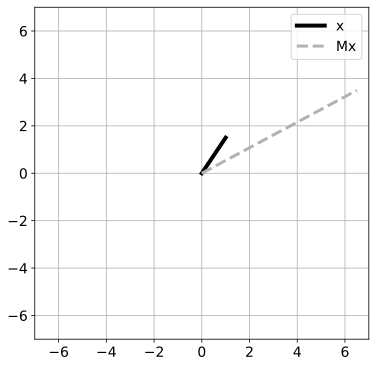

In [172]:
plt.figure(figsize=(6,6))
plt.plot([0,x[0,0]],[0,x[1,0]],'k',linewidth=4,label='x')
plt.plot([0,Mx[0,0]],[0,Mx[1,0]],'--',linewidth=3,color=[.7,.7,.7],label='Mx')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.grid()
plt.show()

<br>

#### 벡터가 행렬의 고유벡터라면, 곱셈의 결과는 회전하지 않음

In [170]:
M  = np.array([ [2,3],[2,1] ])
v  = np.array([ [1.5,1] ]).T 
Mv = M@v

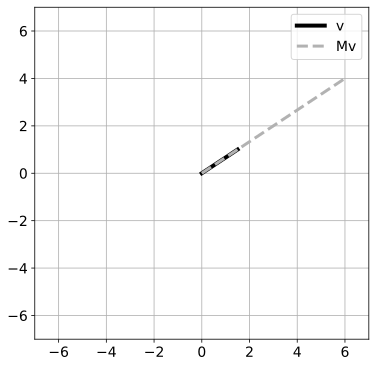

In [171]:
plt.figure(figsize=(6,6))
plt.plot([0,v[0,0]],[0,v[1,0]],'k',linewidth=4,label='v')
plt.plot([0,Mv[0,0]],[0,Mv[1,0]],'--',linewidth=3,color=[.7,.7,.7],label='Mv')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.grid()
plt.show()

<br>

## 04.04. 전치
### 전치 (Transpose)
- 행과 열을 뒤집음

$$C^{TT}=C$$
$$C^T_{i,j}= C_{j, i}$$

#### `np.transpose()`

In [173]:
print('A:')
A = np.array([ [3,4,5],[1,2,3] ])
print(A)

A:
[[3 4 5]
 [1 2 3]]


In [174]:
A_T1 = A.T
A_T2 = np.transpose(A) 

print('Tranposed A:')
print(A_T1)

Tranposed A:
[[3 1]
 [4 2]
 [5 3]]


In [176]:
print(' Double Transposed A:')
A_TT = A_T1.T 
print(A_TT)

 Double Transposed A:
[[3 4 5]
 [1 2 3]]


<br>

## 04.05. LIVE EVIL
$$(LIVE)^T=E^T V^T I^T L^T$$

In [182]:
L = np.random.randn(2,6)
I = np.random.randn(6,3)
V = np.random.randn(3,5)
E = np.random.randn(5,2)

- $(LIVE)^T$

In [189]:
res1 = ( L@I@V@E ).T
print(res1)

[[-1.43681472 -1.82283939]
 [ 1.35929053  1.67764738]]


- $E^T V^T I^T L^T$

In [190]:
res3 = E.T @ V.T @ I.T @ L.T
print(res3)

[[-1.43681472 -1.82283939]
 [ 1.35929053  1.67764738]]


- $(LIVE)^T=E^T V^T I^T L^T$

In [191]:
np.isclose(res1, res3)

array([[ True,  True],
       [ True,  True]])

<br>

## 04.06. 대칭행렬

### 대칭행렬 (Symmetric matrix)
- 대응되는 행과 열이 같은 집합

    **즉, $A^T = A$가 성립**
    
- **정방행렬만이 대칭행렬이 될 수 있음**

<br>


### 비대칭행렬로부터 대칭행렬 생성 (곱셈 기법, multiplicative method)
- **어떤 행렬이든 자신의 전치를 곱하면 정방 대칭 행렬이 생성됨**

    **즉, $A^T A$와 $A A^T$모두 정방 대칭 행렬**
    
    - 만약 $A$가 $M \times N$이라면, $A^T A$는 $(N \times M)(M \times N)$ $\rightarrow$ $(N \times N)$
    
<br>

$$(A^T A)^T = A^T A^{TT}=A^T A$$